# Изучение метода регуляризации.
Ознакомьтесь с концепцией регуляризации и её влиянием на обучение моделей.

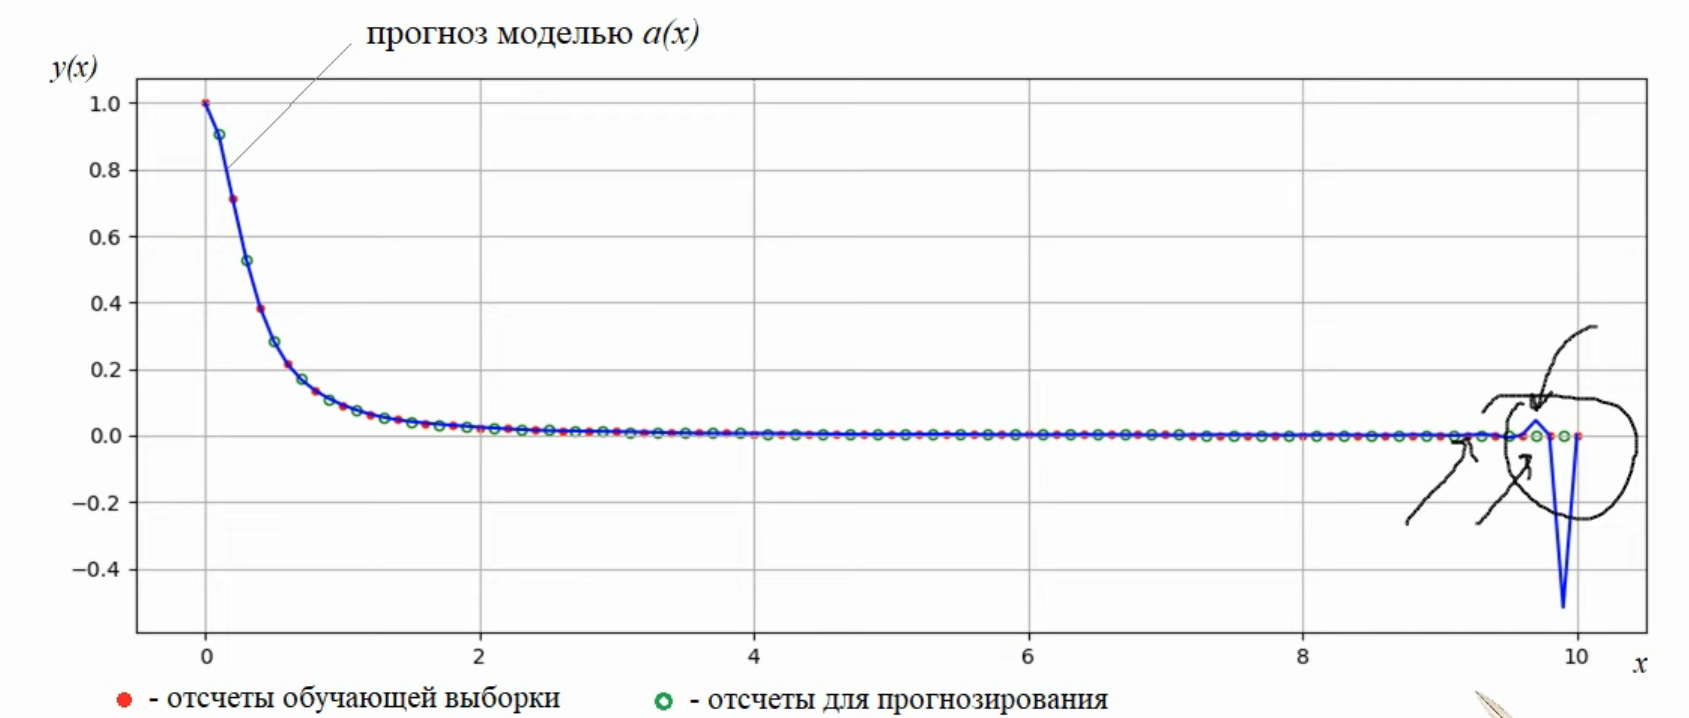

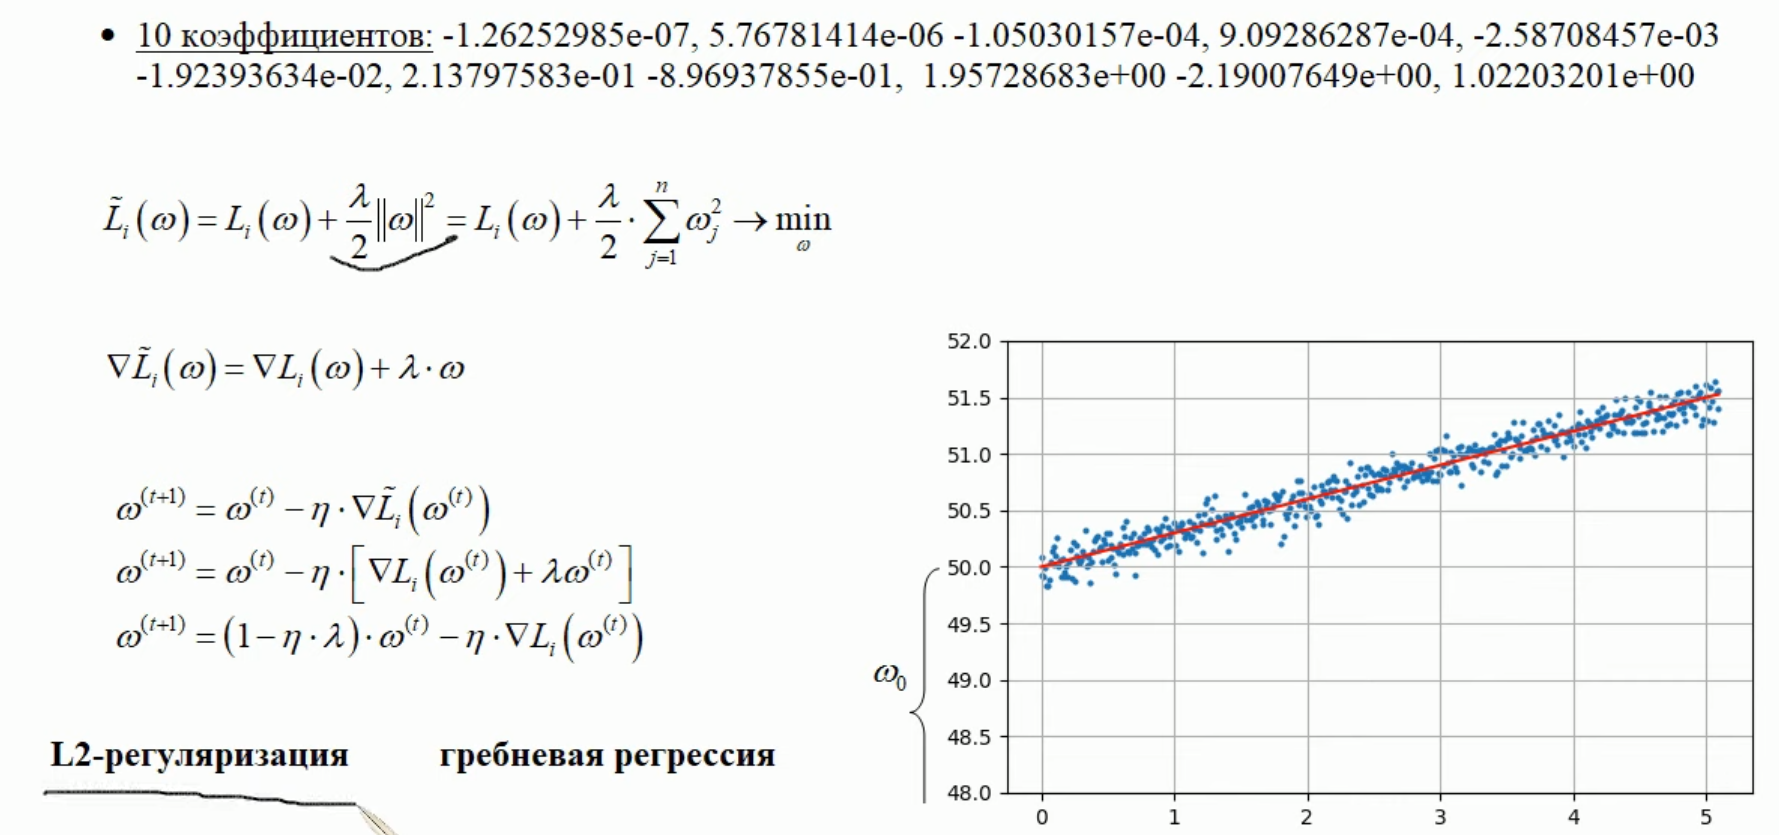

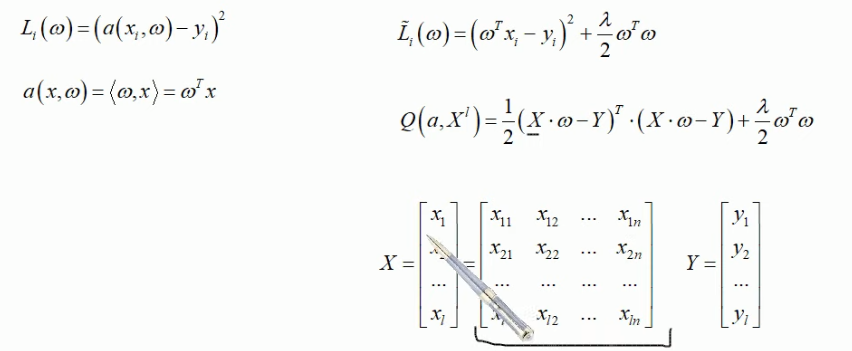

Регуляризатор L2 ridge регрессии необходим в случае переобучения модели, с помощью коэфицента alpha мы можем уменьшить разбросс наших данных (наши данные становятся менее большими) и в результате мы получаем менее переобученную модель

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели линейной регрессии с регуляризацией L2 (Ridge)
ridge_model = Ridge(alpha=0.1)

# Обучение модели на обучающем наборе данных
ridge_model.fit(X_train, y_train)

# Оценка производительности модели на тестовом наборе данных
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse*100

3.9097243116783544

# Применение Lasso-регрессии для уменьшения количества признаков.
Примените Lasso-регрессию для уменьшения количества признаков и изучите
влияние параметра регуляризации на количество отобранных признаков.

In [2]:
# Инициализация модели линейной регрессии с регуляризацией L1 (Lasso)
lasso_model = Lasso(alpha=0.1)

# Обучение модели на обучающем наборе данных
lasso_model.fit(X_train, y_train)

# Вывод отобранных признаков
selected_features =  lasso_model.coef_ != 0
selected_features

array([False, False,  True, False])

In [3]:
# Оценка производительности модели с регуляризацией на тестовом наборе данных
ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))

# Оценка производительности модели с Lasso-регрессией на тестовом наборе данных
lasso_mse = mean_squared_error(y_test, lasso_model.predict(X_test))

In [4]:
print('Ridge_MSE %s, Lasso_MSE %s' % (round(ridge_mse,4)*100,round(lasso_mse,4)*100))

Ridge_MSE 3.73, Lasso_MSE 6.68


# Дополнительные задания
1. Исследуйте влияние параметра регуляризации на производительность
моделей и количество отобранных признаков.
2. Реализуйте сравнительный анализ моделей с использованием различных
методов регуляризации.

In [21]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели линейной регрессии с регуляризацией L2 (Ridge)
pipeline_ridge_model = [
    ('apha=0.001',0.001),
    ('apha=0.2',0.2),
    ('apha=0.9',0.9),
    ('apha=2',2),
    ('apha=30',30),
    ('apha=200',200)
]

for i in range(len(pipeline_ridge_model)):
  ridge_model = Ridge(alpha = pipeline_ridge_model[i][1])
  lasso_model = Lasso(alpha = pipeline_ridge_model[i][1])
  ridge_model.fit(X_train, y_train)
  lasso_model.fit(X_train, y_train)
  ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
  lasso_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
  print('%s Ridge_MSE %s, Lasso_MSE %s' % (pipeline_ridge_model[i][0],round(ridge_mse,4)*100,round(lasso_mse,4)*100))

apha=0.001 Ridge_MSE 3.71, Lasso_MSE 3.73
apha=0.2 Ridge_MSE 3.75, Lasso_MSE 7.720000000000001
apha=0.9 Ridge_MSE 3.8899999999999997, Lasso_MSE 34.92
apha=2 Ridge_MSE 4.07, Lasso_MSE 70.06
apha=30 Ridge_MSE 5.43, Lasso_MSE 70.06
apha=200 Ridge_MSE 11.03, Lasso_MSE 70.06


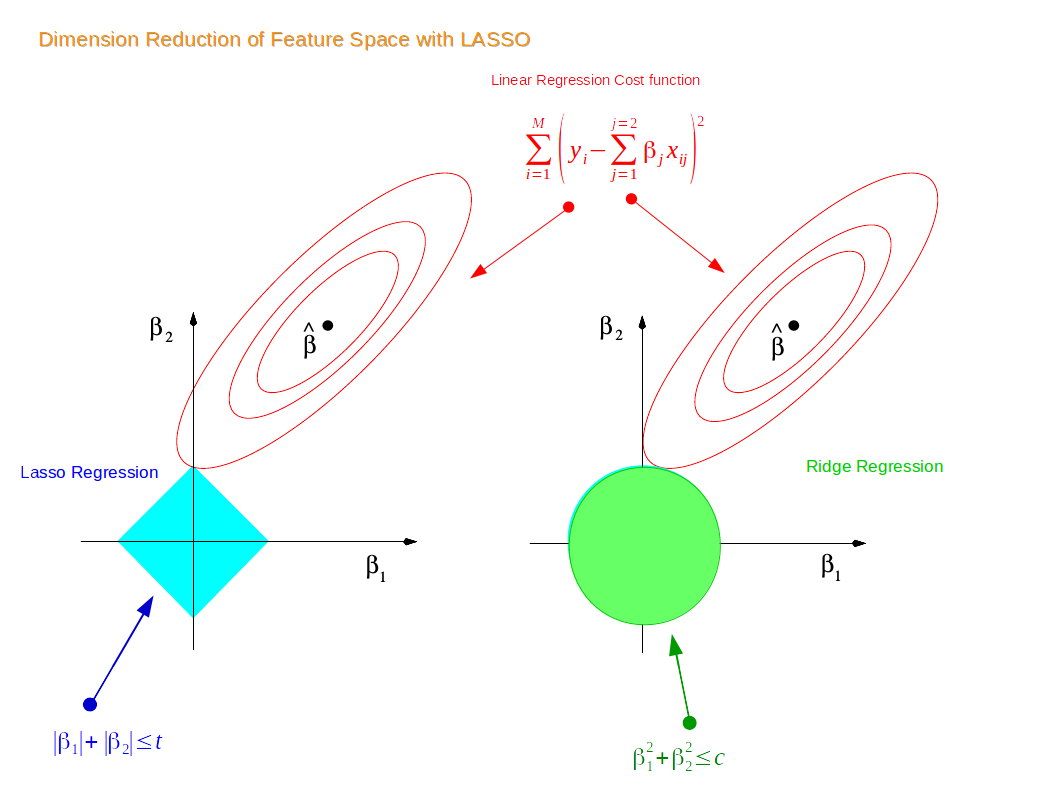

Lasso регрессия использует L1 регуляризацию, которая штрафует коэффициенты модели на основе абсолютных значений их суммы. Это приводит к отбору наиболее важных признаков и упрощению модели. Влияние параметра регуляризации на производительность модели и количество отобранных признаков в Lasso регрессии может быть исследовано путем изменения значения параметра и анализа результатов.

Ridge регрессия, с другой стороны, использует L2 регуляризацию, которая штрафует коэффициенты модели на основе их квадратичной суммы. Это помогает уменьшить влияние шумовых признаков и улучшить устойчивость модели к мультиколлинеарности. Влияние параметра регуляризации на производительность модели и количество отобранных признаков в Ridge регрессии также может быть исследовано путем изменения значения параметра и анализа результатов.

Картинки нужны для общего представления lasso и ridge регрессии.
для начала разберемся по формулам откуда всё берется.
1. RSS.

Формула для RSS:

RSS = Σ(yᵢ - ȳ)²

RSS представляет собой сумму квадратов разностей между фактическими значениями зависимой переменной и предсказанными значениями модели. Она используется для измерения разброса точек данных относительно регрессионной модели.

2. Lasso регрессия использует L1-регуляризацию, которая добавляет штраф на сумму абсолютных значений коэффициентов модели.

Формула Lasso Loss:

Lasso Loss = RSS + α * Σ|β|

где α - мы задаем в параметре alpha

β - коэффициенты модели

3.  Ridge регрессия использует L2-регуляризацию, которая добавляет штраф на сумму квадратов коэффициентов модели.

Формула Ridge Loss:

Ridge Loss = RSS + α * Σ(β²)

где α - мы задаем в параметре alpha

β - коэффициенты модели

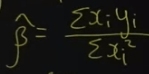


почему ridge регрессия отработала лучше при больших коэфицентах нежели lasso?
все дело в квадрате коэфицента бетта (в Ridge), который снижает увеличение весов в модели. Убедится можно в графиках ниже. Где при увеличении alpha увеличивается разбросс в данных и чем выше alpha тем больше так скажем модель переобучается.
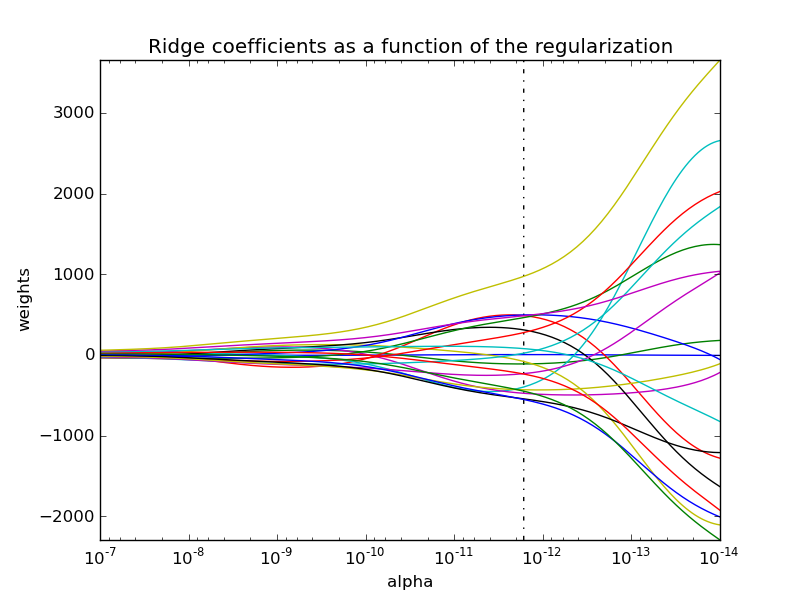
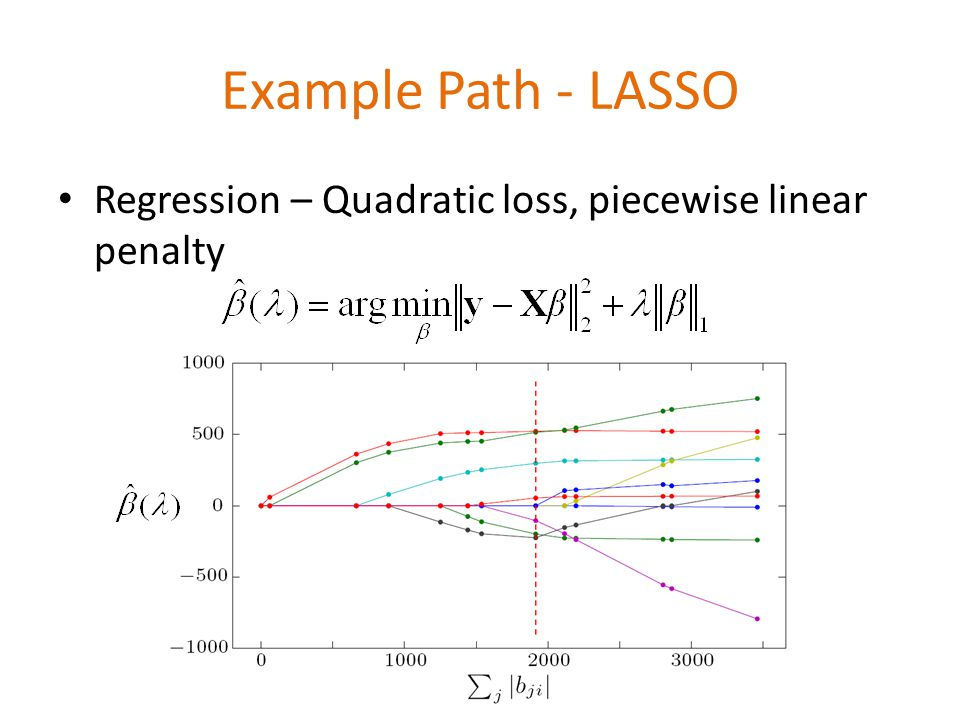